In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.abspath('../src'))

import pandas as pd

df = pd.read_csv('../data/raw/train.csv')

In [2]:
df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [3]:
df.dtypes

id                                      int64
age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
smoking_status                         object
employment_status                 

In [4]:
num_col = df.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_col = df.select_dtypes(exclude=["int64","float64"]).columns.tolist()
target = 'diagnosed_diabetes'
if target in num_col:
    num_col.remove(target)
print(len(num_col),"num col:\n\t",num_col,'\n')
print(len(cat_col),"cat col:\n\t",cat_col)

19 num col:
	 ['id', 'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history'] 

6 cat col:
	 ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
ex = pd.read_csv('../data/external/diabetes_dataset.csv')

In [7]:
ex.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [22]:
print(sum(ex.isna().sum()))

0


In [8]:
from pprint import pprint

count = 0
l = []

for col in ex.columns:
    if col in df.columns:
        count += 1
    else:
        l.append(col)


print(f"total orig cols {len(ex.columns)}")
print(f" overlap {count} / {len(df.columns)}")
print(f"ori not in syn {l}")

print(f"df syntetic cols:  {df.columns}")
print(f"ex original cols:  {ex.columns}")

total orig cols 31
 overlap 25 / 26
ori not in syn ['glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diabetes_stage']
df syntetic cols:  Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')
ex original cols:  Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sl

In [9]:
from config import ORDINAL_COLS,NOMINAL_COLS

cat_cols = ORDINAL_COLS+NOMINAL_COLS

for col in cat_cols:
    print('ex', ex[col].nunique(), ex[col].unique())
    print('df', df[col].nunique(), df[col].unique())

ex 4 ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
df 4 ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
ex 5 ['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']
df 5 ['Lower-Middle' 'Upper-Middle' 'Low' 'Middle' 'High']
ex 3 ['Never' 'Former' 'Current']
df 3 ['Current' 'Never' 'Former']
ex 3 ['Male' 'Female' 'Other']
df 3 ['Female' 'Male' 'Other']
ex 5 ['Asian' 'White' 'Hispanic' 'Black' 'Other']
df 5 ['Hispanic' 'White' 'Asian' 'Black' 'Other']
ex 4 ['Employed' 'Unemployed' 'Retired' 'Student']
df 4 ['Employed' 'Retired' 'Student' 'Unemployed']


In [23]:
from config import NUMERIC_COLS

for col in NUMERIC_COLS:
    min_val = df[col].min()
    max_val = df[col].max()
    
    ex = ex[
        (ex[col] >= min_val) & 
        (ex[col] <= max_val)
    ]

In [29]:
from config import TARGET
print(ex[TARGET].value_counts(normalize=True))
print(df[TARGET].value_counts(normalize=True))

diagnosed_diabetes
1    0.61194
0    0.38806
Name: proportion, dtype: float64
diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64


age                  | Train: 19.0 - 89.0     | Ext: 19.0 - 89.0
alcohol_consumption_per_week | Train: 1.0 - 9.0       | Ext: 1.0 - 9.0
physical_activity_minutes_per_week | Train: 1.0 - 747.0     | Ext: 1.0 - 728.0
diet_score           | Train: 0.1 - 9.9       | Ext: 0.1 - 9.9
sleep_hours_per_day  | Train: 3.1 - 9.9       | Ext: 3.1 - 9.9
screen_time_hours_per_day | Train: 0.6 - 16.5      | Ext: 0.6 - 16.5
bmi                  | Train: 15.1 - 38.4     | Ext: 15.1 - 38.4
waist_to_hip_ratio   | Train: 0.7 - 1.1       | Ext: 0.7 - 1.1
systolic_bp          | Train: 91.0 - 163.0    | Ext: 91.0 - 163.0
diastolic_bp         | Train: 51.0 - 104.0    | Ext: 51.0 - 104.0
heart_rate           | Train: 42.0 - 101.0    | Ext: 42.0 - 101.0
cholesterol_total    | Train: 117.0 - 289.0   | Ext: 117.0 - 289.0
hdl_cholesterol      | Train: 21.0 - 90.0     | Ext: 21.0 - 90.0
ldl_cholesterol      | Train: 51.0 - 205.0    | Ext: 51.0 - 205.0
triglycerides        | Train: 31.0 - 290.0    | Ext: 31.0 - 290.0


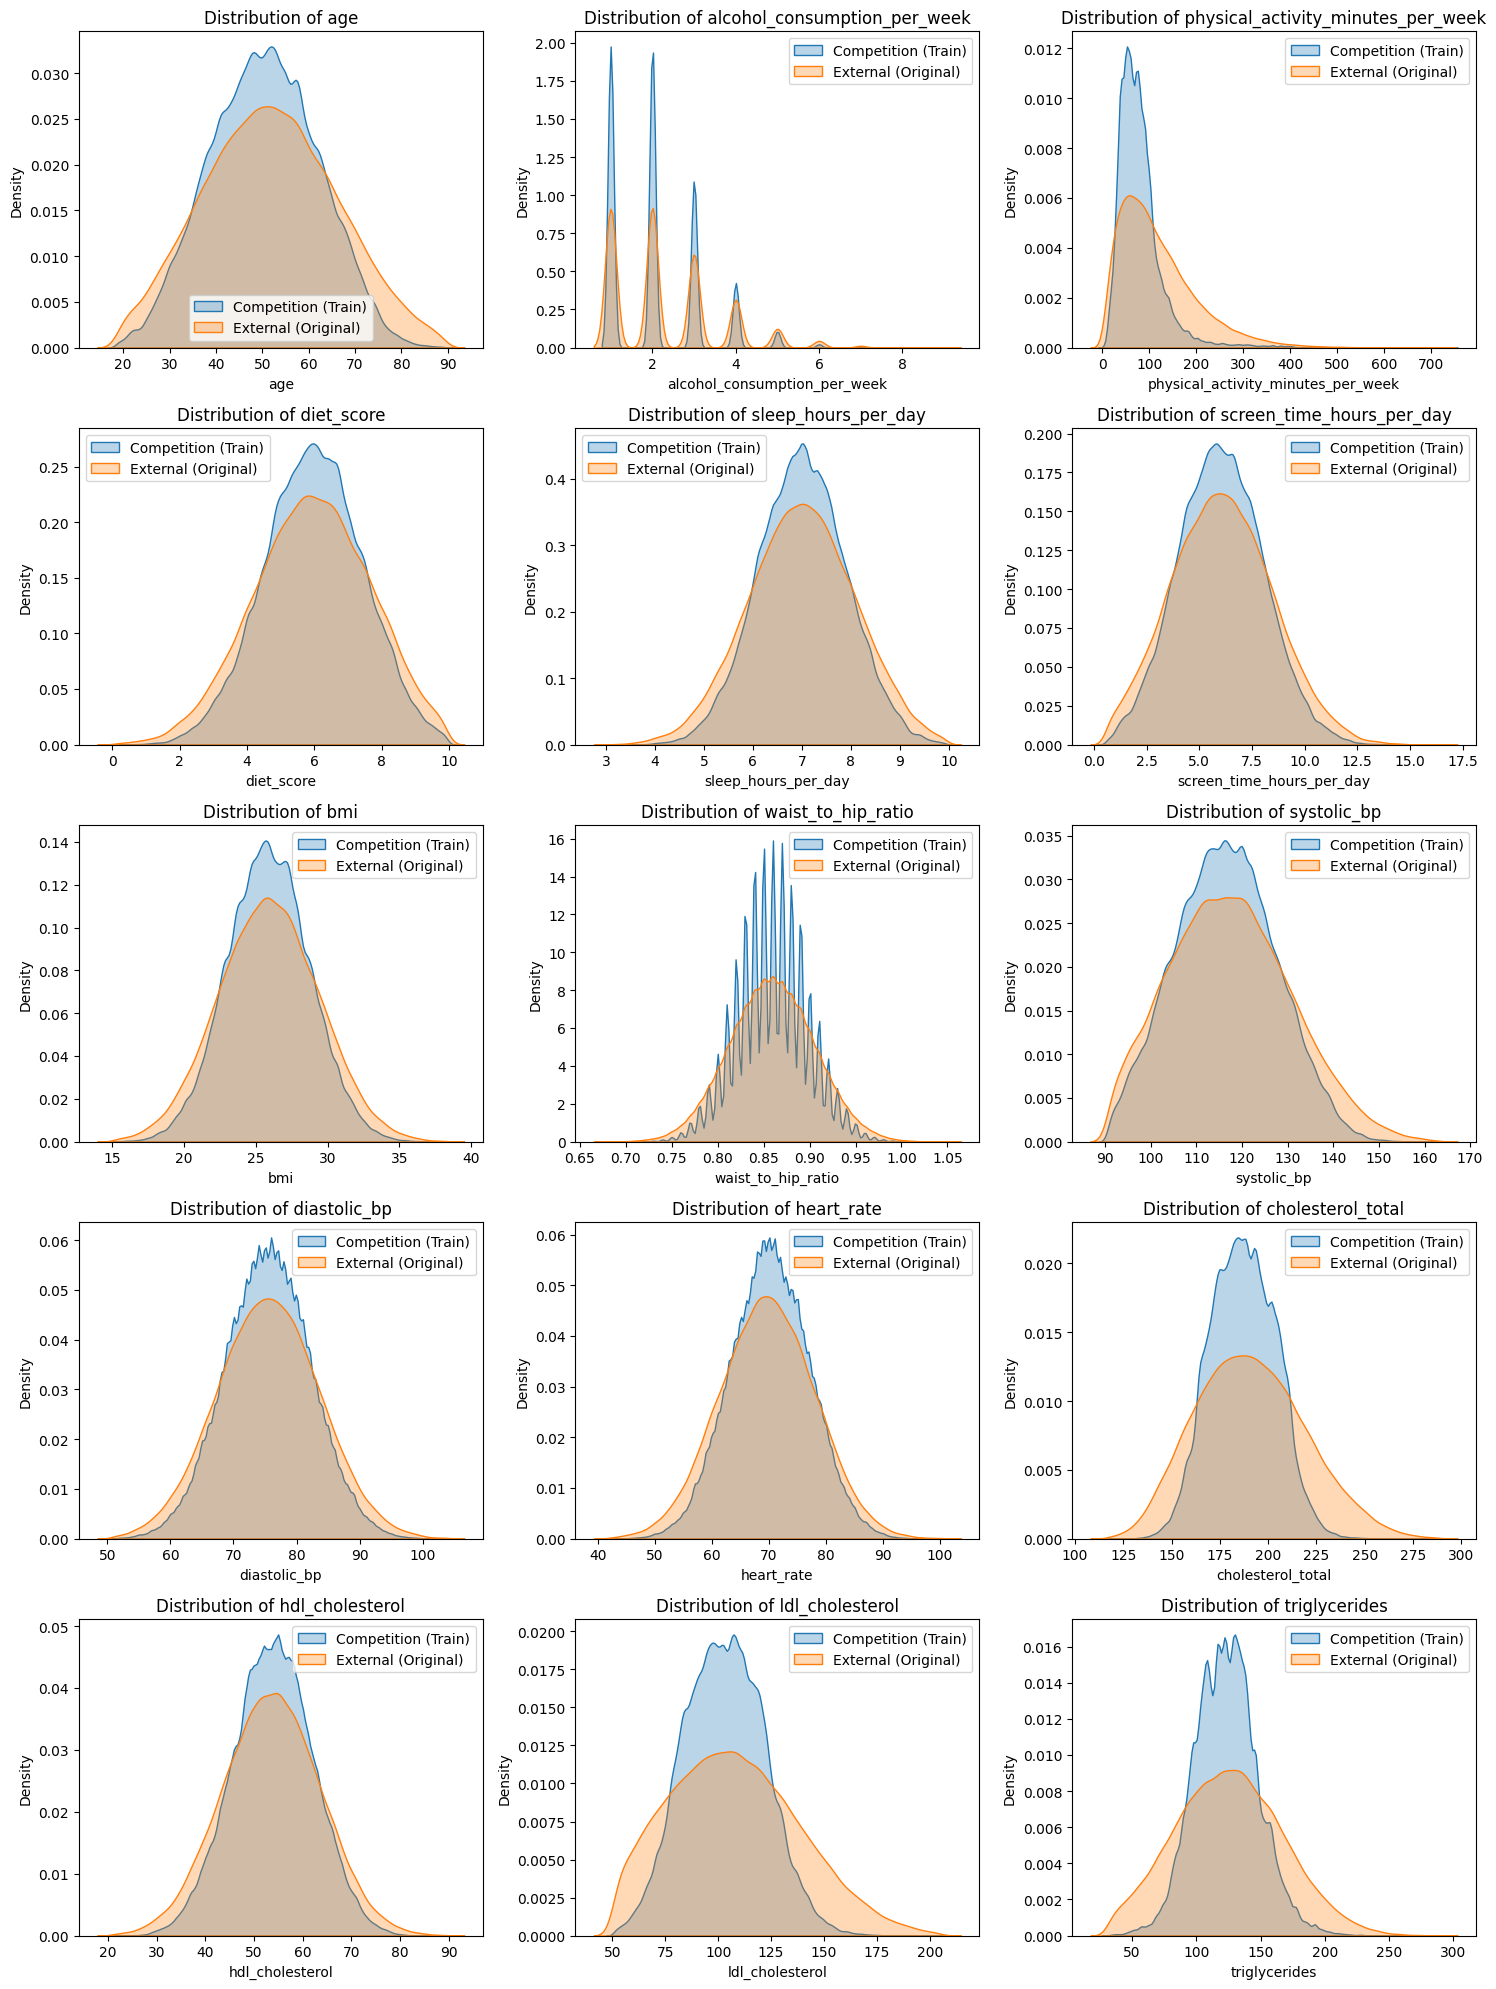

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Setup the plot grid
n_cols = 3
n_rows = (len(NUMERIC_COLS) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(NUMERIC_COLS):
    if col in df.columns and col in ex.columns:
        ax = axes[i]
        
        # Plot Train Data (Blue)
        sns.kdeplot(
            data=df, x=col, 
            label='Competition (Train)', fill=True, alpha=0.3, ax=ax
        )
        
        # Plot External Data (Orange)
        sns.kdeplot(
            data=ex, x=col, 
            label='External (Original)', fill=True, alpha=0.3, ax=ax
        )
        
        ax.set_title(f"Distribution of {col}")
        ax.legend()

# Turn off empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [25]:
for col in NUMERIC_COLS:
    if col in df.columns and col in ex.columns:
        t_mean = df[col].mean()
        e_mean = ex[col].mean()
        ratio = t_mean / e_mean
        
        # Flag suspicious ratios (close to 18, 38, or 88)
        flag = ""
        if 30 < ratio < 45: flag = "<-- LIKELY CHOLESTEROL UNIT MISMATCH (x38.67)"
        if 80 < ratio < 100: flag = "<-- LIKELY TRIGLYCERIDES UNIT MISMATCH (x88.57)"
        if 15 < ratio < 20: flag = "<-- LIKELY GLUCOSE UNIT MISMATCH (x18.02)"
        
        # Check for reverse mismatch (if external is smaller)
        if 0.02 < ratio < 0.03: flag = "<-- REVERSE CHOLESTEROL (Divide by 38.67)"
        
        print(f"{col:<35} | {t_mean:.1f}      | {e_mean:.1f}     | {ratio:.2f} {flag}")

age                                 | 50.4      | 51.7     | 0.97 
alcohol_consumption_per_week        | 2.1      | 2.3     | 0.89 
physical_activity_minutes_per_week  | 80.2      | 118.2     | 0.68 
diet_score                          | 6.0      | 5.9     | 1.01 
sleep_hours_per_day                 | 7.0      | 7.0     | 1.00 
screen_time_hours_per_day           | 6.0      | 6.1     | 0.99 
bmi                                 | 25.9      | 25.9     | 1.00 
waist_to_hip_ratio                  | 0.9      | 0.9     | 1.00 
systolic_bp                         | 116.3      | 117.4     | 0.99 
diastolic_bp                        | 75.4      | 75.5     | 1.00 
heart_rate                          | 70.2      | 69.7     | 1.01 
cholesterol_total                   | 186.8      | 190.9     | 0.98 
hdl_cholesterol                     | 53.8      | 53.5     | 1.01 
ldl_cholesterol                     | 102.9      | 107.7     | 0.96 
triglycerides                       | 123.1      | 125.4     | 0.

In [26]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
from data_loader import DiabetesLoader

In [ ]:
loader = DiabetesLoader('../data/raw/train.csv')
loader.load_external('../data/external/diabetes_dataset.csv')

X,y = loader.get_full()

Loading data from /app/data/raw/train.csv
Data Loaded. Shape: (700000, 25)
loading external data from ../data/external/diabetes_dataset.csv


In [ ]:
display(X.head())
print(X.shape)
print(X[X.is_external == 1].shape)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,is_external
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,0


(800000, 25)
(100000, 25)


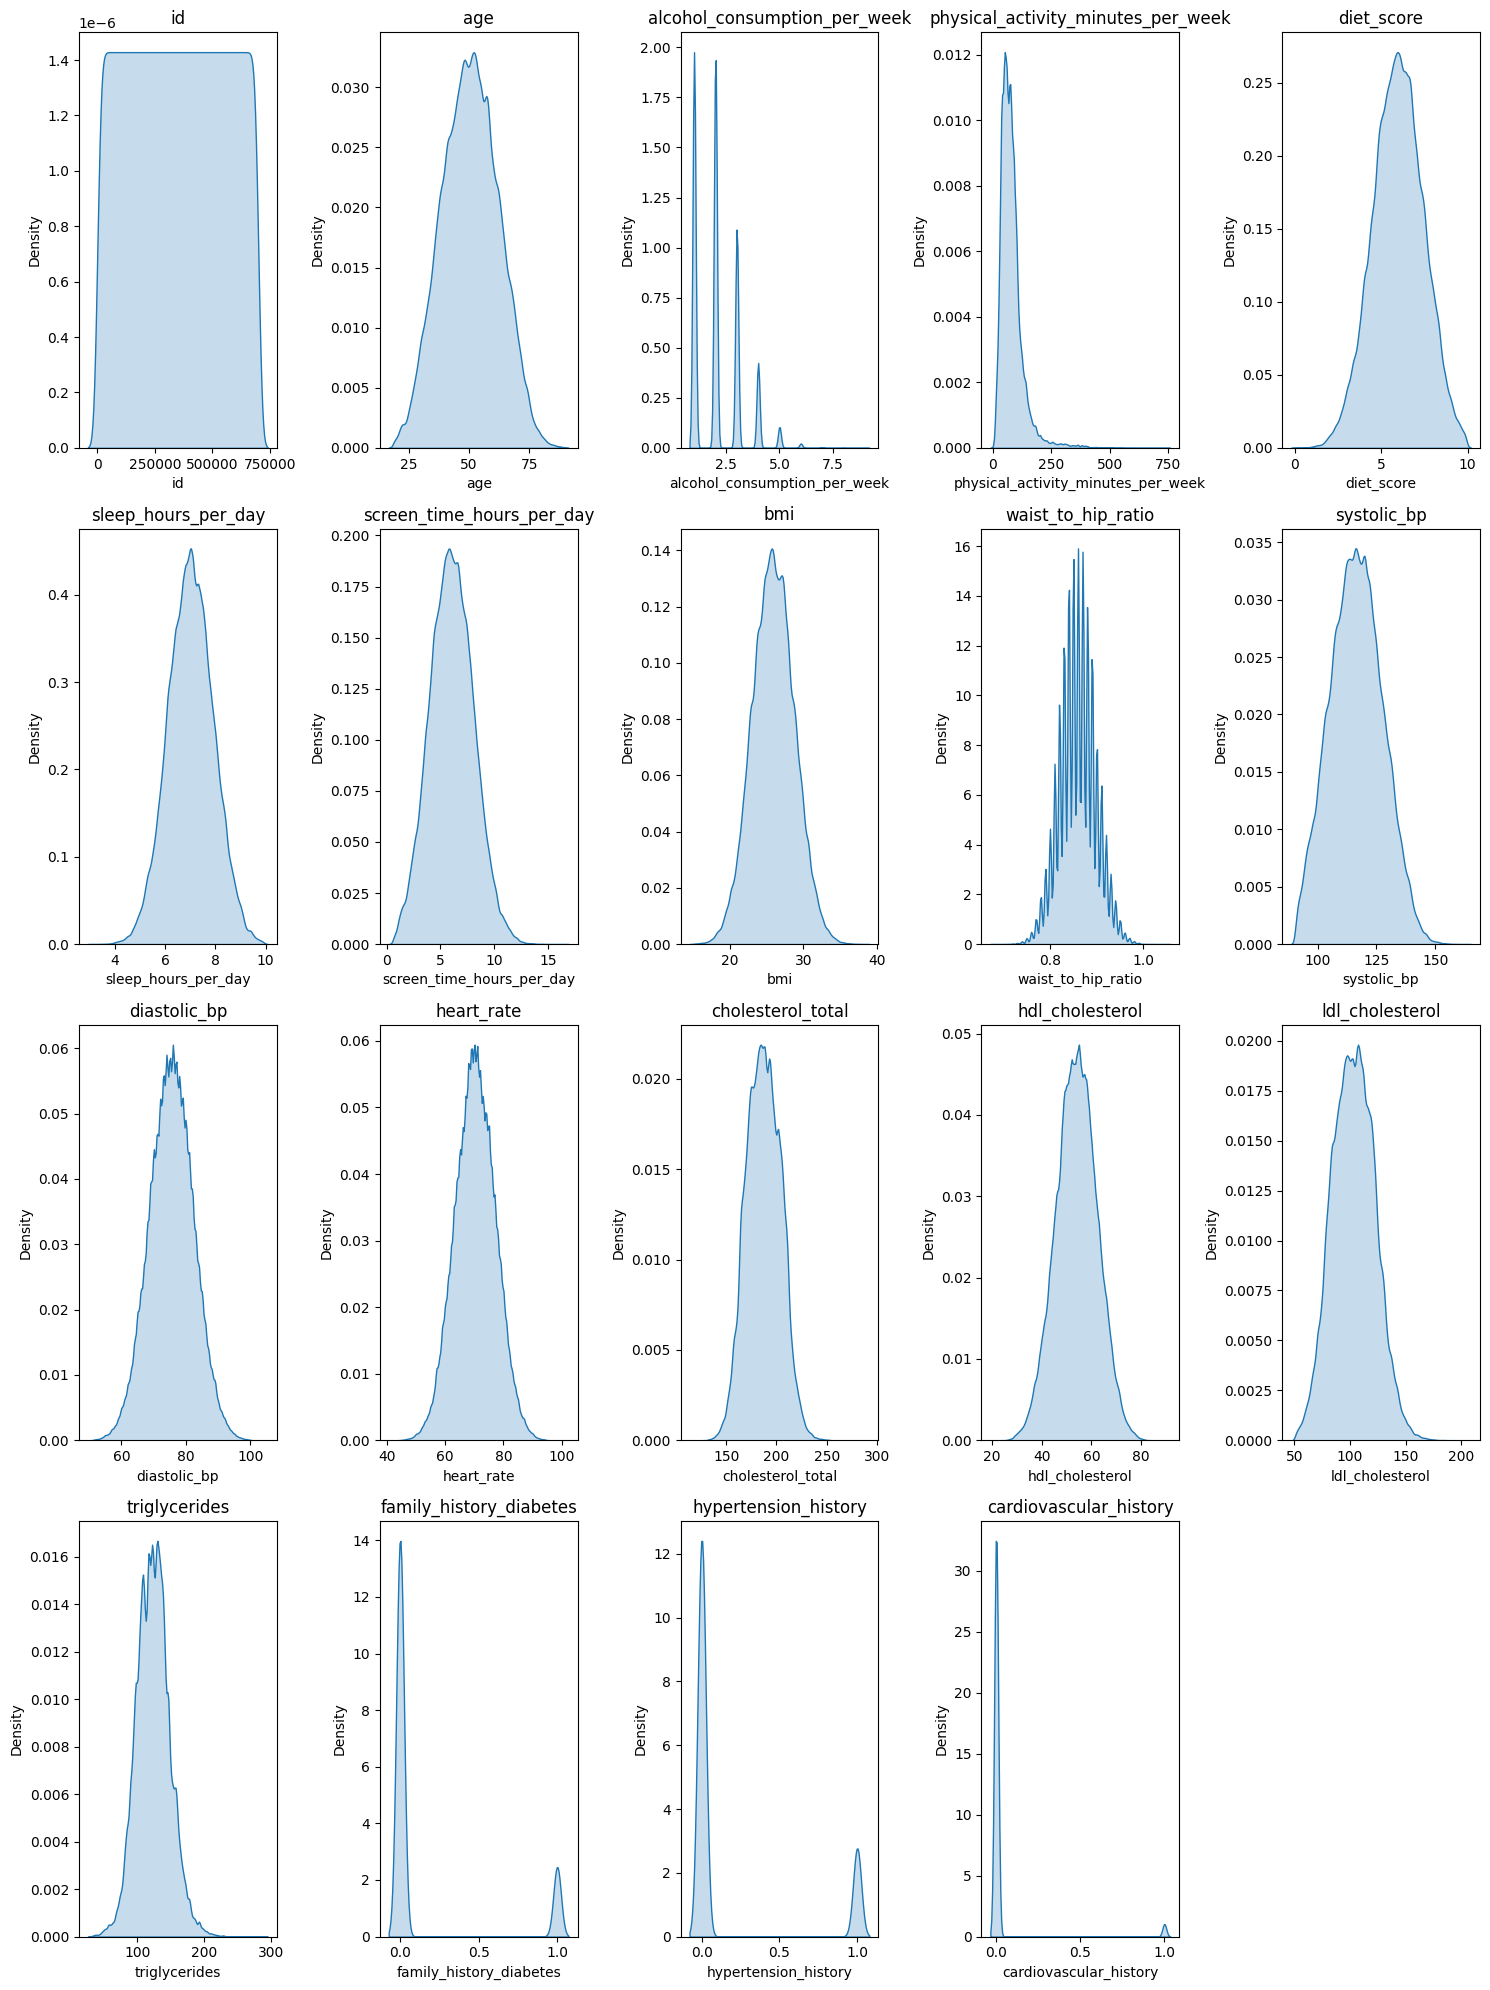

In [ ]:
import math

n_cols = 5
n_rows = math.ceil(len(num_col) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(num_col):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# from graph
discrete = ['alcohol_consumption_per_week','waist_to_hip_ratio']
for col in discrete:
    print(col, df[col].nunique())
    print(df[col].value_counts())



alcohol_consumption_per_week 9
alcohol_consumption_per_week
2    246592
1    246311
3    137565
4     52973
5     13322
6      2728
7       447
8        59
9         3
Name: count, dtype: int64
waist_to_hip_ratio 36
waist_to_hip_ratio
0.86    71899
0.87    71297
0.85    70990
0.84    67272
0.88    62140
0.83    56619
0.89    54104
0.82    44306
0.90    37224
0.81    32817
0.91    29348
0.80    20936
0.92    19871
0.79    13803
0.93    12771
0.78     8871
0.94     8036
0.77     4781
0.95     4491
0.76     2265
0.96     2184
0.97     1161
0.75     1110
0.98      555
0.74      510
0.99      246
0.73      214
0.72       88
1.00       30
0.71       25
1.01       16
1.02        7
0.69        6
0.70        5
0.68        1
1.05        1
Name: count, dtype: int64


In [ ]:
df.isna().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


gender :  gender
Female    363237
Male      333085
Other       3678
Name: count, dtype: int64
ethnicity :  ethnicity
White       386153
Hispanic    129984
Black       106301
Asian        60120
Other        17442
Name: count, dtype: int64
education_level :  education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64
income_level :  income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64
smoking_status :  smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64
employment_status :  employment_status
Employed      516170
Retired       115735
Unemployed     49787
Student        18308
Name: count, dtype: int64


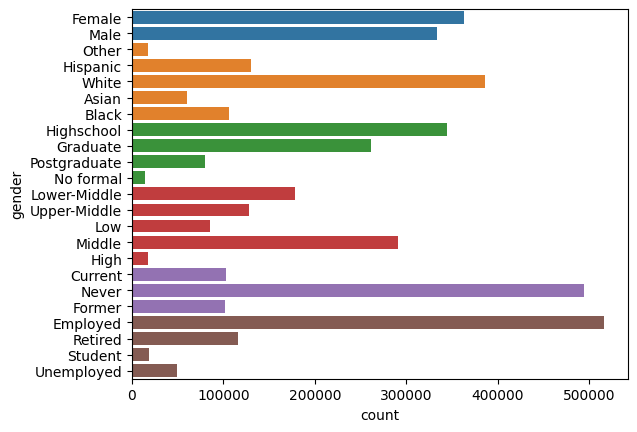

In [ ]:
for col in cat_col:
    sns.countplot(df[col])
    print(col, ": ", df[col].value_counts())

In [ ]:
bool_col = [col for col in df.columns if df[col].nunique() == 2]
print(bool_col)

['family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']


In [ ]:
ordinal_col = ['education_level', 'income_level','smoking_status']

In [ ]:
print(df['diagnosed_diabetes'].value_counts(normalize=True))
print(df.shape)
print(df.duplicated().sum())

diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64
(700000, 26)
0


In [ ]:
import numpy as np

corr_matrix = df[num_col].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [ ]:
print(upper['bmi'])

id                                    0.000692
age                                   0.062958
alcohol_consumption_per_week          0.017552
physical_activity_minutes_per_week    0.085086
diet_score                            0.198899
sleep_hours_per_day                   0.003380
screen_time_hours_per_day             0.002758
bmi                                        NaN
waist_to_hip_ratio                         NaN
systolic_bp                                NaN
diastolic_bp                               NaN
heart_rate                                 NaN
cholesterol_total                          NaN
hdl_cholesterol                            NaN
ldl_cholesterol                            NaN
triglycerides                              NaN
family_history_diabetes                    NaN
hypertension_history                       NaN
cardiovascular_history                     NaN
Name: bmi, dtype: float64


In [ ]:
max_cor = [(max(upper[col]),col) for col in upper.columns]
max_cor.sort(reverse=True)
print(max_cor)

[(nan, 'id'), (0.8059086316189383, 'ldl_cholesterol'), (0.7571906972030713, 'waist_to_hip_ratio'), (0.5028937384866652, 'systolic_bp'), (0.4438371291749694, 'triglycerides'), (0.283155386035676, 'cholesterol_total'), (0.26842558562108365, 'heart_rate'), (0.1988987342618339, 'bmi'), (0.19770247530793847, 'hdl_cholesterol'), (0.18840315401248214, 'diastolic_bp'), (0.1776357303176586, 'hypertension_history'), (0.09960359481081432, 'cardiovascular_history'), (0.0352602546838715, 'family_history_diabetes'), (0.029101336236848033, 'physical_activity_minutes_per_week'), (0.008466134854470727, 'diet_score'), (0.006899710039296226, 'sleep_hours_per_day'), (0.005964942283897499, 'screen_time_hours_per_day'), (0.003294751352274793, 'alcohol_consumption_per_week'), (0.0016148588041543471, 'age')]


In [ ]:
print("bool ",bool_col)
print("ordinal ",ordinal_col)
used = bool_col+ordinal_col+['id']
num_col = [col for col in num_col if col not in used]
used += num_col
nominal_col = [col for col in cat_col if col not in used]
print("nominal ",nominal_col)
print("numeric ", num_col)

bool  ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']
ordinal  ['education_level', 'income_level', 'smoking_status']
nominal  ['gender', 'ethnicity', 'employment_status']
numeric  ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides']


education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64
income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64
smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64


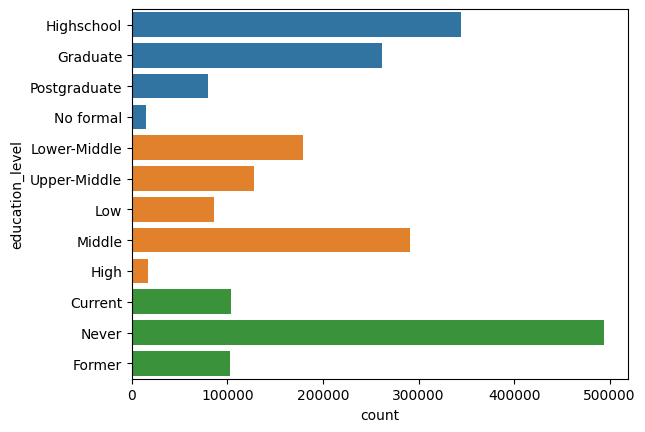

In [ ]:
for col in ordinal_col:
    sns.countplot(df[col])
    print(df[col].value_counts())

In [ ]:
[['No formal','Highschool','Graduate','Postgraduate'],
 ['Low','Lower-Middle','Middle','Upper-Middle','High'],
 ['Never','Current','Former']]